In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import csv
import os
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Weekly

## Each day of the week (fig 3A)

In [ ]:
record_dir = './cgm_count_by_day/'

In [ ]:
nums = 0
for filename in os.listdir(record_dir):
  if filename[-4:] == '.csv':
    nums += 1
print(nums)

108


In [ ]:
week_summary_normalized = []

for filename in os.listdir(record_dir):
  if filename[-4:] == '.csv':
    df = pd.read_csv(record_dir + filename)
    date_lst = [i.split(' ')[0] for i in df['displayTime'].values]

    df['Weekday'] = [datetime.strptime(i, '%Y-%m-%d').weekday()  for i in date_lst]
    # https://pythontic.com/datetime/date/weekday
    # 0 - Monday, 1 - Tuesday, ... , 6 - Sunday

    week_dict = {i:[] for i in range(7)}
    for i in df.values:
      if i[3] > 288:
        week_dict[i[5]].append(1)
      else:
        week_dict[i[5]].append(i[3] / 288)
    # print(week_dict)

    weekday_avg = [np.mean(v) for _, v in week_dict.items()]
    # print(weekday_avg)
    overall = [] # avg adherence ratio of all days
    for i in week_dict.values():
      overall += i
    all_avg = np.mean(overall)
    # print(len(overall))
    normalized_avg = [(i - all_avg) / all_avg for i in weekday_avg]
    week_summary_normalized.append([filename[:-4]] + normalized_avg)
    # print(week_summary)
    # break

In [ ]:
df_week = pd.DataFrame(week_summary_normalized, columns = ['ID', 'Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
df_week.to_csv('./weekday_summary_normalized.csv', index=False)

In [ ]:
week_summary_normalized = pd.read_csv('./weekday_summary_normalized.csv')
week_summary_arr = np.array(week_summary_normalized)
week_mean = [np.mean(week_summary_arr[:, i].astype('float64')) for i in range(1, 8)]
week_std = [np.std(week_summary_arr[:, i].astype('float64')) for i in range(1, 8)]

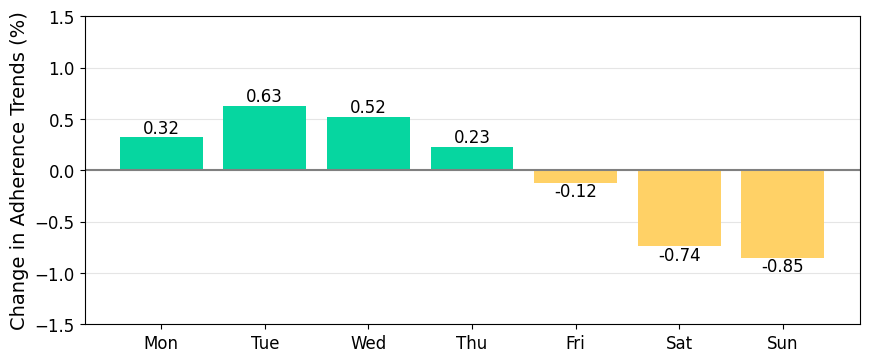

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
week_mean_percentage = [i * 100 for i in week_mean]

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', alpha= .2)

col = []
for val in week_mean_percentage:
  if val >= 0:
    col.append('#06D6A0')
  else:
    col.append('#FFD166')

plt.bar(label, week_mean_percentage, color=col)
for i, v in enumerate(week_mean_percentage):
  if v >= 0:
    plt.text(i, v , str(round(v, 2)), ha='center', va='bottom', fontsize=12)
  else:
    plt.text(i, v - .17, str(round(v, 2)), ha='center', va='bottom', fontsize=12)

ax.axhline(y = 0, c='gray')
ax.yaxis.grid(color='gray', alpha= .2)
ax.set_zorder(0)

plt.yticks(np.arange(-1.5, 2., step=.5), fontsize = 12)
plt.xticks(fontsize = 12)
plt.ylabel('Change in Adherence Trends (%)', fontsize = 14)

plt.savefig("./figures/adherence_weekday.png", bbox_inches='tight')
plt.savefig('./final_figures/fig3/adherence_weekday.png',bbox_inches='tight')
plt.savefig('./final_figures/fig3/adherence_weekday.pdf',bbox_inches='tight')

plt.show()

## Weekdays / Weekends combine (fig 3B)

In [ ]:
record_dir = './cgm_count_by_day/'
# week_summary_normalized = []
high_low_normalized = []
Mon_Thu_lst, Fri_Sun_lst = [], []

for filename in os.listdir(record_dir):
  if filename[-4:] == '.csv':
    df = pd.read_csv(record_dir + filename)
    date_lst = [i.split(' ')[0] for i in df['displayTime'].values]

    df['Weekday'] = [datetime.strptime(i, '%Y-%m-%d').weekday()  for i in date_lst]
    # https://pythontic.com/datetime/date/weekday
    # 0 - Monday, 1 - Tuesday, ... , 6 - Sunday

    week_dict = {i:[] for i in range(7)}
    for i in df.values:
      if i[3] > 288:
        week_dict[i[5]].append(1)
      else:
        week_dict[i[5]].append(i[3] / 288)
    # print(week_dict)

    # Mon - Thu, Fri - Sun
    high_lst, low_lst = [], []
    for k,v in week_dict.items():
      if k <= 3:
        high_lst += v
      else:
        low_lst += v
    high_avg, low_avg = np.mean(high_lst), np.mean(low_lst)
    Mon_Thu_lst.append(high_avg)
    Fri_Sun_lst.append(low_avg)
    all_avg = np.mean(high_lst + low_lst) # avg of all day's adherence ratio
    # print(len(overall))
    normalized_avg = [(i - all_avg) / all_avg for i in [high_avg, low_avg]]
    high_low_normalized.append([filename[:-4]] + normalized_avg)
    # print(week_summary)

In [1]:
high_low_arr = np.array(high_low_normalized)
high_low_mean = [np.mean(high_low_arr[:, i].astype('float64')) * 100 for i in range(1, 3)]
print(high_low_mean)

high_low_std = [np.std(high_low_arr[:, i].astype('float64')) * 100 for i in range(1, 3)]
print(high_low_std)

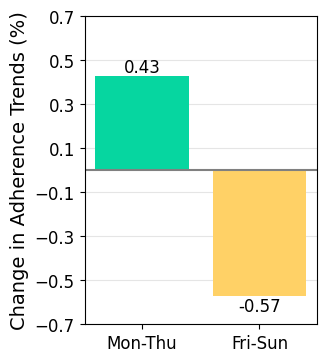

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(3, 4)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', alpha= .2)

label = ['Mon-Thu', 'Fri-Sun']
high_low_per = [i * 100 for i in high_low_mean]

col = []
for val in low_high_per:
  if val >= 0:
    col.append('#06D6A0')
  else:
    col.append('#FFD166')

plt.bar(label, high_low_per, color=col)
for i, v in enumerate(high_low_per):
  if v >= 0:
    plt.text(i, v + .001, str(round(v, 2)), ha='center', va='bottom', fontsize=12)
  else:
    plt.text(i, v - .09, str(round(v, 2)), ha='center', va='bottom', fontsize=12)

ax.axhline(y = 0, c='gray')
plt.yticks(np.arange(-.7, .9, step=.2), fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Change in Adherence Trends (%)', fontsize = 14)

plt.savefig("./figures/adherence_weekday_group.png",bbox_inches='tight')
plt.savefig('./final_figures/fig3/adherence_weekday_group.png',bbox_inches='tight')
plt.savefig('./final_figures/fig3/adherence_weekday_group.pdf',bbox_inches='tight')

plt.show()

## Paired T-test

In [ ]:
# paired t-test

from scipy.stats import ttest_rel

low_adh = high_low_arr[:, 2]
high_adh = high_low_arr[:, 1]

ttest_rel([float(i) for i in low_adh], [float(i) for i in high_adh])

TtestResult(statistic=-1.9241383076239664, pvalue=0.056993671287167535, df=107)

# Daily adherence 

## Hourly Bar plot (fig 3C)

In [ ]:
hour_root = './cgm_count_by_hour/'
day_root = './cgm_count_by_day/'
df_summary = pd.read_csv('./CGM_summary.csv')
users = df_summary.Subject.values

In [ ]:
# hour_dict = {k:[] for k in np.arange(0, 24, 1)}
hour_adh_dict = {k:[] for k in np.arange(0, 24, 1)}

for i in users:
  day_df = pd.read_csv(day_root + i + '.csv')
  hour_df = pd.read_csv(hour_root + i + '.csv')
  hour_df['Date'] = [i.split(' ')[0] for i in hour_df.displayTime.values]

  # only use the days that have cgm records
  non_empty_date = []
  for i in day_df.values:
    if i[3] != 0:
      non_empty_date.append(i[0].split(' ')[0])

  cur_hour_dict = {k:[] for k in np.arange(0, 24, 1)}
  for i in non_empty_date:
    cur_hour_df = hour_df[hour_df['Date'] == i]
    for j in cur_hour_df.values:
      if j[1] <= 12:
        cur_hour_dict[j[3]].append(j[1] / 12)
      else:
        cur_hour_dict[j[3]].append(1)

  for k,v in hour_adh_dict.items():
    # avg adherence of each subject
    hour_adh_dict[k].append(np.mean(cur_hour_dict[k]))

  # break

In [2]:
hour_adh_mean = [np.mean(v) for k,v in hour_adh_dict.items()]
avg = np.mean(hour_adh_mean)
hour_mean = [(i - avg) / avg for i in hour_adh_mean]
print(hour_mean) # changed percentage
print(avg)

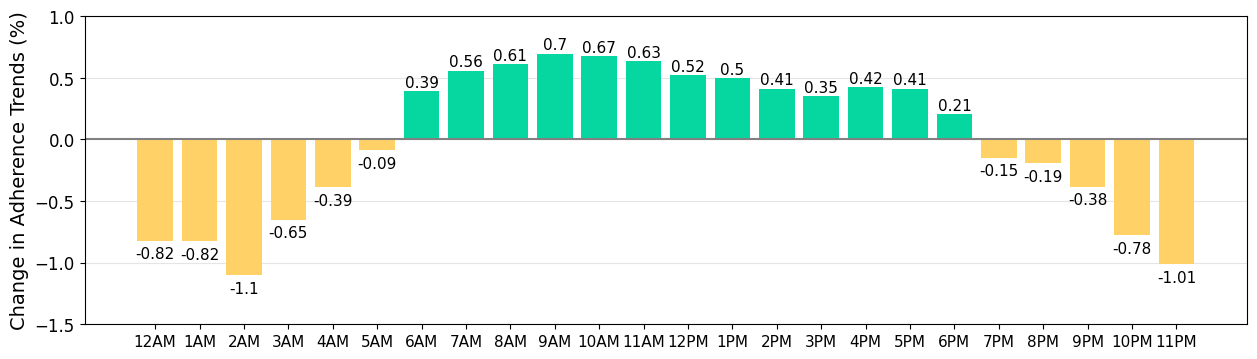

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)

label =["%d%s" % (n % 12 or 12, ["AM", "PM"][n > 11]) for n in range(24)]
hour_mean_percentage = [i * 100 for i in hour_mean]

col = []
for val in hour_mean_percentage:
  if val >= 0:
    col.append('#06D6A0')
  else:
    col.append('#FFD166')

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', alpha= .2)

ax.bar(label, hour_mean_percentage, color=col)
for i, v in enumerate(hour_mean_percentage):
  if v >= 0:
    plt.text(i, v + .01, str(round(v, 2)), ha='center', va='bottom', fontsize=11)
  else:
    plt.text(i, v - .17, str(round(v, 2)), ha='center', va='bottom', fontsize=11)

ax.axhline(y = 0, c='gray')

plt.yticks(np.arange(-1.5, 1.5, step=.5), fontsize=12)
plt.xticks(fontsize=11)
plt.ylabel('Change in Adherence Trends (%)', fontsize = 14)

plt.savefig("./figures/hourly_adherence/hourly_adherence_all.png", bbox_inches='tight')
plt.savefig('./final_figures/fig3/hourly_adherence.png',bbox_inches='tight')
plt.savefig('./final_figures/fig3/hourly_adherence.pdf',bbox_inches='tight')

plt.show()

## Daytime/ Nighttime combine (fig 3D)
* high: 6am - 6pm, low: 7pm - 5am


In [ ]:
hour_root = './cgm_count_by_hour/'
day_root = './cgm_count_by_day/'
df_summary = pd.read_csv('./CGM_summary.csv')
users = df_summary.Subject.values

In [ ]:
hour_adh_dict = {k:[] for k in np.arange(0, 24, 1)}

for i in users:
  day_df = pd.read_csv(day_root + i + '.csv')
  hour_df = pd.read_csv(hour_root + i + '.csv')
  hour_df['Date'] = [i.split(' ')[0] for i in hour_df.displayTime.values]

  # only use the days that have cgm records
  non_empty_date = []
  for i in day_df.values:
    if i[3] != 0:
      non_empty_date.append(i[0].split(' ')[0])

  cur_hour_dict = {k:[] for k in np.arange(0, 24, 1)}
  for i in non_empty_date:
    cur_hour_df = hour_df[hour_df['Date'] == i]
    for j in cur_hour_df.values:
      if j[1] <= 12:
        cur_hour_dict[j[3]].append(j[1] / 12)
      else:
        cur_hour_dict[j[3]].append(1)

  for k,v in hour_adh_dict.items():
    # hour_dict[k].append((np.mean(cur_hour_dict[k]) - sum_mean) / sum_mean)
    hour_adh_dict[k].append(np.mean(cur_hour_dict[k]))

  # break

In [ ]:
hour_adh_mean = [np.mean(v) for k,v in hour_adh_dict.items()]
avg = np.mean(hour_adh_mean)

In [3]:
low_adh, high_adh = [], []
low_adh_val, high_adh_val = [], []

for i in range(len(hour_adh_dict[0])):
  cur_low, cur_high = [], []
  for k,v in hour_adh_dict.items():
    if k <= 5 or k >= 19:
      cur_low.append(v[i])
    else:
      cur_high.append(v[i])

  # normalized_avg
  low_adh.append((np.mean(cur_low) - avg) / avg)
  high_adh.append((np.mean(cur_high) - avg) / avg)

  low_adh_val.append(np.mean(cur_low))
  high_adh_val.append(np.mean(cur_high))

# print(low_adh, '\n', high_adh, '\n', len(low_adh))

In [ ]:
print(np.mean(high_adh) * 100 , np.mean(low_adh)* 100)
print(np.std(high_adh)* 100, np.std(low_adh)* 100)

0.49148563698792386 -0.5808466618948106
8.229383598062634 9.249345726384


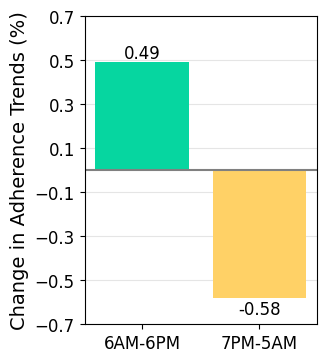

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(3, 4)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', alpha= .2)

label = ['6AM-6PM', '7PM-5AM']
low_high_per = [i * 100 for i in [np.mean(high_adh), np.mean(low_adh)]]

col = []
for val in low_high_per:
  if val >= 0:
    col.append('#06D6A0')
  else:
    col.append('#FFD166')

plt.bar(label, low_high_per, color=col)
for i, v in enumerate(low_high_per):
  if v >= 0:
    plt.text(i, v + .001, str(round(v, 2)), ha='center', va='bottom', fontsize=12)
  else:
    plt.text(i, v - .09, str(round(v, 2)), ha='center', va='bottom', fontsize=12)

ax.axhline(y = 0, c='gray')
plt.yticks(np.arange(-.7, .9, step=.2), fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Change in Adherence Trends (%)', fontsize = 14)

plt.savefig("./figures/adherence_daily_group.png",bbox_inches='tight')
plt.show()

## paired t-Test

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html
# https://www.jmp.com/en_us/statistics-knowledge-portal/t-test/paired-t-test.html

from scipy.stats import ttest_rel
ttest_rel(high_adh, low_adh)

TtestResult(statistic=3.64338971240514, pvalue=0.0004167717092089273, df=107)